In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# confirmed cases
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

# death cases
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url, error_bad_lines=False)

# recovered cases
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("UK", "United Kingdom")
death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")
death['Country/Region']= death['Country/Region'].str.replace("UK", "United Kingdom")
recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")
recover['Country/Region']= recover['Country/Region'].str.replace("UK", "United Kingdom")


In [ ]:
confirmed.info()

In [ ]:
url = 'https://raw.githubusercontent.com/Rank23/COVID19/master/population.csv'
population = pd.read_csv(url, sep=",", encoding='latin1')

In [ ]:
population.head()

In [ ]:
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

confirmed[' Population '].fillna(1, inplace = True)
death[' Population '].fillna(1, inplace = True)
recover[' Population '].fillna(1, inplace = True)

In [ ]:
confirmed[' Population ']

In [ ]:
# pip install countryinfo

In [ ]:
# !pip install qwikidata

In [ ]:
# import qwikidata
# import qwikidata.sparql
# ##################################################### This was already done ####################################################
# def get_city_wikidata(city, country):
#     query = """
#     SELECT ?city ?cityLabel ?country ?countryLabel ?population
#     WHERE
#     {
#       ?city rdfs:label '%s'@en.
#       ?city wdt:P1082 ?population.
#       ?city wdt:P17 ?country.
#       ?city rdfs:label ?cityLabel.
#       ?country rdfs:label ?countryLabel.
#       FILTER(LANG(?cityLabel) = "en").
#       FILTER(LANG(?countryLabel) = "en").
#       FILTER(CONTAINS(?countryLabel, "%s")).
#     }
#     """ % (city, country)

#     res = qwikidata.sparql.return_sparql_query_results(query)
#     out = res['results']['bindings'][0]
#     return out

In [ ]:
# from countryinfo import CountryInfo

# # country = CountryInfo('Singapore')
# # country.info()['population']

In [ ]:
# # Get the population of the city

# population = []
# for i in range(0,len(confirmed)):
#   try:
#     t=get_city_wikidata(confirmed.iloc[i,0],confirmed.iloc[i,1])
#     t={key: t[key] for key in t.keys()&{'population'}} 
#     t=list(t.values())
#     population.append(int(t[0]['value']))
#   except Exception:
#     try:
#       population.append(int(CountryInfo(confirmed.iloc[i,1]).info()['population']))
#     except Exception:
#       population.append(1)

In [ ]:
# merge region
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:5,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,Population,region
0,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,"62,000,000",China_Anhui
1,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,"21,710,000",China_Beijing
2,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,"7,990,000",China_Chongqing
3,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,"36,894,216",China_Fujian
4,Gansu,China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,"25,575,254",China_Gansu


In [ ]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [ ]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
ts_rec=create_ts(recover)

In [ ]:
ts

region,Afghanistan_nan,Algeria_nan,Andorra_nan,Argentina_nan,Armenia_nan,Australia_From Diamond Princess,Australia_New South Wales,Australia_Northern Territory,Australia_Queensland,Australia_South Australia,Australia_Tasmania,Australia_Victoria,Australia_Western Australia,Austria_nan,Azerbaijan_nan,Bahrain_nan,Belarus_nan,Belgium_nan,Bhutan_nan,Bosnia and Herzegovina_nan,Brazil_nan,Cambodia_nan,Cameroon_nan,"Canada_ Montreal, QC",Canada_British Columbia,"Canada_Calgary, Alberta","Canada_Edmonton, Alberta","Canada_London, ON","Canada_Toronto, ON",Chile_nan,China_Anhui,China_Beijing,China_Chongqing,China_Fujian,China_Gansu,China_Guangdong,China_Guangxi,China_Guizhou,China_Hainan,China_Hebei,...,"United States_Nassau County, NY","United States_New York County, NY","United States_Omaha, NE (From Diamond Princess)","United States_Orange County, CA","United States_Pierce County, WA","United States_Pinal County, AZ","United States_Placer County, CA","United States_Plymouth County, MA","United States_Providence County, RI","United States_Ramsey County, MN","United States_Rockland County, NY","United States_Sacramento County, CA","United States_San Antonio, TX","United States_San Benito, CA","United States_San Diego County, CA","United States_San Francisco County, CA","United States_San Mateo, CA","United States_Santa Clara County, CA","United States_Santa Cruz County, CA","United States_Santa Rosa County, FL","United States_Sarasota, FL","United States_Saratoga County, NY","United States_Snohomish County, WA","United States_Sonoma County, CA","United States_Suffolk County, MA","United States_Summit County, CO","United States_Travis, CA (From Diamond Princess)","United States_Tulsa County, OK","United States_Umatilla, OR",United States_Unassigned Location (From Diamond Princess),"United States_Unassigned Location, WA","United States_Wake County, NC","United States_Washington County, OR","United States_Washoe County, NV","United States_Wayne County, PA","United States_Westchester County, NY","United States_Williamson County, TN","United States_Yolo County, CA",Vatican City_nan,Vietnam_nan
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,6,1,0,26,2,1,4,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,22,9,5,2,32,5,3,5,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,36,27,10,2,53,23,3,8,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,41,57,18,4,78,23,4,19,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1/26/20,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,60,68,75,35,7,111,36,5,22,13,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1/27/20,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,70,80,110,59,14,151,46,7,33,18,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1/28/20,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,106,91,132,80,19,207,51,9,40,33,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1/29/20,0,0,0,0,0,0,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,152,111,147,84,24,277,58,9,43,48,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1/30/20,0,0,0,0,0,0,4,0,3,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,200,114,182,101,26,354,78,12,46,65,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1/31/20,0,0,0,0,0,0,4,0,2,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,237,139,211,120,29,436,87,29,52,82,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Text(0.5, 1.0, 'Daily Total Recovered - Major areas')

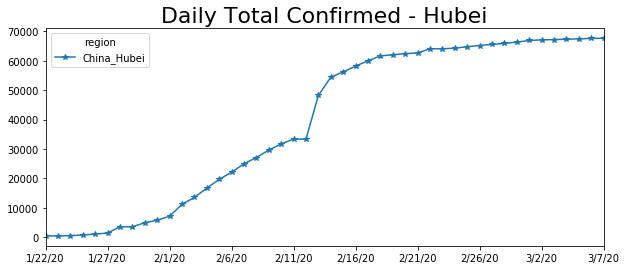

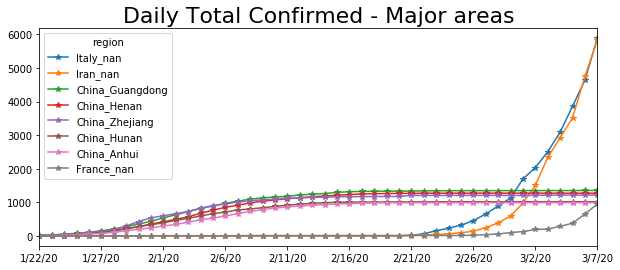

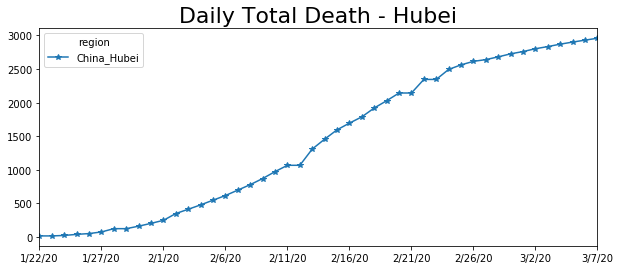

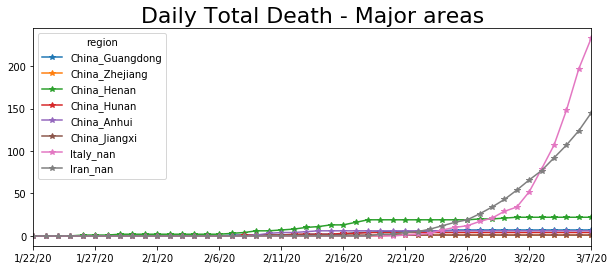

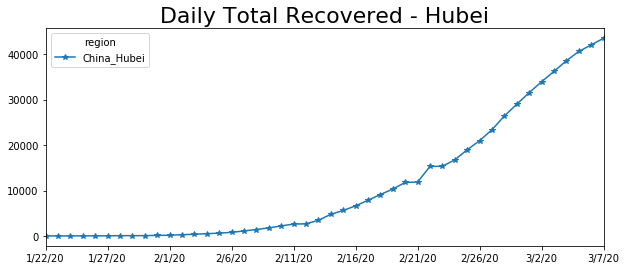

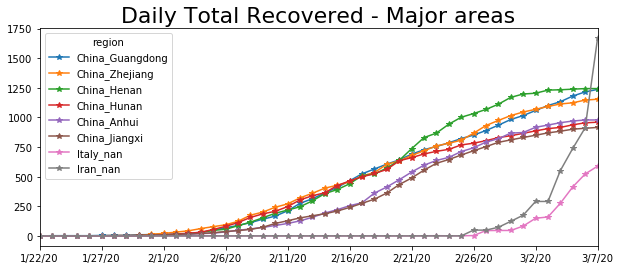

In [ ]:
# sort regions with number of confirmed cases largest to smallest
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)

p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Hubei',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Hubei',fontdict={'fontsize': 22})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recovered - Hubei',fontdict={'fontsize': 22})
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recovered - Major areas',fontdict={'fontsize': 22})

In [ ]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date']).dt.date
ts_r.to_csv('/content/drive/My Drive/corona-virus/ts_r.csv')

In [ ]:
ts_r.tail()

region,date,Afghanistan_nan,Algeria_nan,Andorra_nan,Argentina_nan,Armenia_nan,Australia_From Diamond Princess,Australia_New South Wales,Australia_Northern Territory,Australia_Queensland,Australia_South Australia,Australia_Tasmania,Australia_Victoria,Australia_Western Australia,Austria_nan,Azerbaijan_nan,Bahrain_nan,Belarus_nan,Belgium_nan,Bhutan_nan,Bosnia and Herzegovina_nan,Brazil_nan,Cambodia_nan,Cameroon_nan,"Canada_ Montreal, QC",Canada_British Columbia,"Canada_Calgary, Alberta","Canada_Edmonton, Alberta","Canada_London, ON","Canada_Toronto, ON",Chile_nan,China_Anhui,China_Beijing,China_Chongqing,China_Fujian,China_Gansu,China_Guangdong,China_Guangxi,China_Guizhou,China_Hainan,...,"United States_Nassau County, NY","United States_New York County, NY","United States_Omaha, NE (From Diamond Princess)","United States_Orange County, CA","United States_Pierce County, WA","United States_Pinal County, AZ","United States_Placer County, CA","United States_Plymouth County, MA","United States_Providence County, RI","United States_Ramsey County, MN","United States_Rockland County, NY","United States_Sacramento County, CA","United States_San Antonio, TX","United States_San Benito, CA","United States_San Diego County, CA","United States_San Francisco County, CA","United States_San Mateo, CA","United States_Santa Clara County, CA","United States_Santa Cruz County, CA","United States_Santa Rosa County, FL","United States_Sarasota, FL","United States_Saratoga County, NY","United States_Snohomish County, WA","United States_Sonoma County, CA","United States_Suffolk County, MA","United States_Summit County, CO","United States_Travis, CA (From Diamond Princess)","United States_Tulsa County, OK","United States_Umatilla, OR",United States_Unassigned Location (From Diamond Princess),"United States_Unassigned Location, WA","United States_Wake County, NC","United States_Washington County, OR","United States_Washoe County, NV","United States_Wayne County, PA","United States_Westchester County, NY","United States_Williamson County, TN","United States_Yolo County, CA",Vatican City_nan,Vietnam_nan
41,2020-03-03,1,5,1,1,1,0,13,0,11,3,1,9,2,21,3,49,1,13,0,0,2,1,0,1,9,0,0,1,19,1,990,414,576,296,91,1350,252,146,168,...,0,1,0,1,0,0,1,0,2,0,0,2,1,2,2,0,2,11,0,0,1,0,6,1,1,0,0,0,1,45,0,1,2,0,0,1,0,0,0,16
42,2020-03-04,1,12,1,1,1,0,22,1,11,5,1,10,2,29,3,52,6,23,0,0,4,1,0,1,12,0,0,1,19,1,990,418,576,296,91,1350,252,146,168,...,0,1,0,3,0,0,2,0,2,0,0,2,1,2,2,0,2,11,0,0,1,0,8,1,1,0,0,0,1,45,0,1,2,0,0,10,0,0,0,16
43,2020-03-05,1,12,1,1,1,0,22,1,13,5,1,10,3,41,6,55,6,50,0,2,4,1,0,2,13,0,0,1,21,4,990,418,576,296,102,1351,252,146,168,...,1,4,0,3,0,0,2,0,2,0,0,2,1,2,3,2,2,20,0,1,1,0,18,1,1,0,0,0,1,45,0,1,2,0,0,18,1,0,0,16
44,2020-03-06,1,17,1,2,1,0,26,0,13,7,1,10,3,55,6,60,6,109,1,2,13,1,1,2,21,1,0,1,24,4,990,422,576,296,119,1352,252,146,168,...,1,16,0,3,0,0,5,1,2,1,0,2,1,2,3,2,2,20,0,1,1,0,19,1,3,2,0,0,1,45,5,1,2,1,1,19,1,1,1,16
45,2020-03-07,1,17,1,8,1,0,28,0,13,7,1,11,3,79,9,85,6,169,1,3,13,1,1,3,21,1,1,1,27,4,990,426,576,296,120,1352,252,146,168,...,4,11,0,3,1,2,5,1,3,1,2,2,1,2,3,9,2,32,1,1,1,2,27,1,3,2,0,1,1,45,5,1,3,1,1,57,1,1,1,18


In [ ]:
ts_r.date

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
5     2020-01-27
6     2020-01-28
7     2020-01-29
8     2020-01-30
9     2020-01-31
10    2020-02-01
11    2020-02-02
12    2020-02-03
13    2020-02-04
14    2020-02-05
15    2020-02-06
16    2020-02-07
17    2020-02-08
18    2020-02-09
19    2020-02-10
20    2020-02-11
21    2020-02-12
22    2020-02-13
23    2020-02-14
24    2020-02-15
25    2020-02-16
26    2020-02-17
27    2020-02-18
28    2020-02-19
29    2020-02-20
30    2020-02-21
31    2020-02-22
32    2020-02-23
33    2020-02-24
34    2020-02-25
35    2020-02-26
36    2020-02-27
37    2020-02-28
38    2020-02-29
39    2020-03-01
40    2020-03-02
41    2020-03-03
42    2020-03-04
43    2020-03-05
44    2020-03-06
45    2020-03-07
Name: date, dtype: object

In [ ]:
ts_r

region,date,Afghanistan_nan,Algeria_nan,Andorra_nan,Argentina_nan,Armenia_nan,Australia_From Diamond Princess,Australia_New South Wales,Australia_Northern Territory,Australia_Queensland,Australia_South Australia,Australia_Tasmania,Australia_Victoria,Australia_Western Australia,Austria_nan,Azerbaijan_nan,Bahrain_nan,Belarus_nan,Belgium_nan,Bhutan_nan,Bosnia and Herzegovina_nan,Brazil_nan,Cambodia_nan,Cameroon_nan,"Canada_ Montreal, QC",Canada_British Columbia,"Canada_Calgary, Alberta","Canada_Edmonton, Alberta","Canada_London, ON","Canada_Toronto, ON",Chile_nan,China_Anhui,China_Beijing,China_Chongqing,China_Fujian,China_Gansu,China_Guangdong,China_Guangxi,China_Guizhou,China_Hainan,...,"United States_Nassau County, NY","United States_New York County, NY","United States_Omaha, NE (From Diamond Princess)","United States_Orange County, CA","United States_Pierce County, WA","United States_Pinal County, AZ","United States_Placer County, CA","United States_Plymouth County, MA","United States_Providence County, RI","United States_Ramsey County, MN","United States_Rockland County, NY","United States_Sacramento County, CA","United States_San Antonio, TX","United States_San Benito, CA","United States_San Diego County, CA","United States_San Francisco County, CA","United States_San Mateo, CA","United States_Santa Clara County, CA","United States_Santa Cruz County, CA","United States_Santa Rosa County, FL","United States_Sarasota, FL","United States_Saratoga County, NY","United States_Snohomish County, WA","United States_Sonoma County, CA","United States_Suffolk County, MA","United States_Summit County, CO","United States_Travis, CA (From Diamond Princess)","United States_Tulsa County, OK","United States_Umatilla, OR",United States_Unassigned Location (From Diamond Princess),"United States_Unassigned Location, WA","United States_Wake County, NC","United States_Washington County, OR","United States_Washoe County, NV","United States_Wayne County, PA","United States_Westchester County, NY","United States_Williamson County, TN","United States_Yolo County, CA",Vatican City_nan,Vietnam_nan
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,6,1,0,26,2,1,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,22,9,5,2,32,5,3,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,36,27,10,2,53,23,3,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,41,57,18,4,78,23,4,19,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2020-01-26,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,60,68,75,35,7,111,36,5,22,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5,2020-01-27,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,70,80,110,59,14,151,46,7,33,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
6,2020-01-28,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,106,91,132,80,19,207,51,9,40,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7,2020-01-29,0,0,0,0,0,0,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,152,111,147,84,24,277,58,9,43,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8,2020-01-30,0,0,0,0,0,0,4,0,3,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,200,114,182,101,26,354,78,12,46,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
9,2020-01-31,0,0,0,0,0,0,4,0,2,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,237,139,211,120,29,436,87,29,52,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
df = ts_r.loc[:, ['date', 'China_Hubei']]
df = df.set_index('date')
dataset, validation = df.iloc[0:-1], df.iloc[-1]

In [ ]:
df

region,China_Hubei
date,
2020-01-22,444
2020-01-23,444
2020-01-24,549
2020-01-25,761
2020-01-26,1058
2020-01-27,1423
2020-01-28,3554
2020-01-29,3554
2020-01-30,4903


In [ ]:
# make data stationary
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [ ]:
# seasonal difference
X = dataset.values
differenced = difference(X, 1)
# fit model
model = ARIMA(differenced, order=(1,1,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   43
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -399.573
Method:                       css-mle   S.D. of innovations           2622.178
Date:                Mon, 09 Mar 2020   AIC                            805.145
Time:                        01:58:19   BIC                            810.429
Sample:                             1   HQIC                           807.094
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1931    294.282      0.004      0.997    -575.589     577.976
ar.L1.D.y     -0.3674      0.139     -2.639      0.012      -0.640      -0.094
                                    Roots           

In [ ]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
df = ts_r.loc[:, ['date', 'China_Hubei']]
df = df.set_index('date')
dataset, validation = df.iloc[0:-5], df.iloc[-5:]

# seasonal difference
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
predict=[]
for yhat in forecast:
	inverted = inverse_difference(history, yhat, 1)
	print('Day %d: %f' % (day, inverted))
	#predict.append(inverted)
	history.append(inverted)
	day += 1

# one-step out of sample forecast
# forecast = model_fit.forecast(steps=7)[0]
# # invert the differenced forecast to something usable
# history = [x for x in X]
# day = 1
# for yhat in forecast:
# 	inverted = inverse_difference(history, yhat, 1)
# 	print('Day %d: %f' % (day, inverted))
# 	history.append(inverted)
# 	day += 1
# print('Forecast: %f' % forecast)

# # one-step out-of sample forecast
# forecast = model_fit.forecast(start=start_index, end=end_index)
# # invert the differenced forecast to something usable
# forecast = inverse_difference(X, forecast, 1)
# print('Forecast: %f' % forecast)


44
Day 1: 67596.570603
Day 2: 67596.522792
Day 3: 67598.171777
Day 4: 67599.197363
Day 5: 67600.451984
Day 6: 67601.622458
Day 7: 67602.823847


In [ ]:
from sklearn.metrics import mean_squared_error
prediction = [67596.570603,67596.522792, 67598.171777,67599.197363, 67600.451984, 67601.622458, 67602.823847]
true = [66907,67103,67217,67332,67466,67592,67666]
mean_squared_error(prediction, true)

136845.69587544666

In [ ]:
len(df)

46

In [ ]:
len(dataset)

41

['22/01', '23/01', '24/01', '25/01', '26/01', '27/01', '28/01', '29/01', '30/01', '31/01', '01/02', '02/02', '03/02', '04/02', '05/02', '06/02', '07/02', '08/02', '09/02', '10/02', '11/02', '12/02', '13/02', '14/02', '15/02', '16/02', '17/02', '18/02', '19/02', '20/02', '21/02', '22/02', '23/02', '24/02', '25/02', '26/02', '27/02', '28/02', '29/02', '01/03', '02/03', '03/03', '04/03', '05/03', '06/03', '07/03']
[array([444]), array([444]), array([549]), array([761]), array([1058]), array([1423]), array([3554]), array([3554]), array([4903]), array([5806]), array([7153]), array([11177]), array([13522]), array([16678]), array([19665]), array([22112]), array([24953]), array([27100]), array([29631]), array([31728]), array([33366]), array([33366]), array([48206]), array([54406]), array([56249]), array([58182]), array([59989]), array([61682]), array([62031]), array([62442]), array([62662]), array([64084]), array([64084]), array([64287]), array([64786]), array([65187]), array([65596]), array([

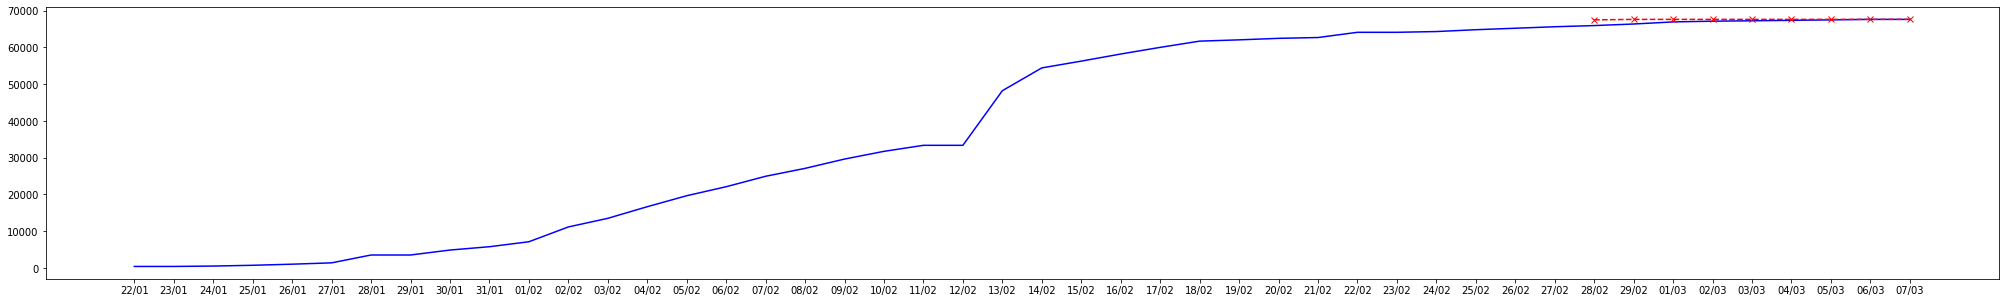

In [ ]:
a = []
for x in range(len(df)):
  a.append(df.index[x].strftime('%d/%m'))
# print(a)
# print(history)

plt.figure(figsize=(35, 5))
plt.plot(a[:46],history[:46], color='blue',label='Train')
plt.plot(a[-9:],history[-9:],'--b',color='red',label='Predicted',marker='x')

plt.show()

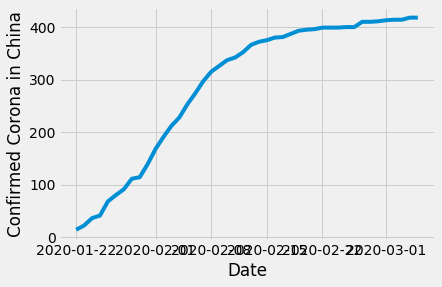

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

result = ts_r['China_Beijing'].iloc[-1]
df = ts_r[:-1].loc[:, ['date', 'China_Beijing']]
df = df.set_index('date')
plt.xlabel('Date')
plt.ylabel('Confirmed Corona in China')
plt.plot(df)

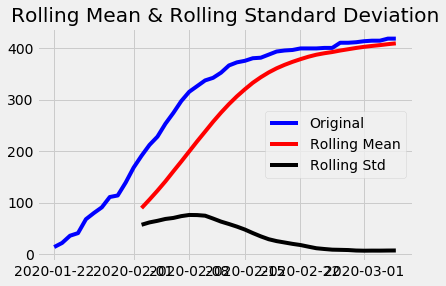

In [ ]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
result = adfuller(df['China_Beijing'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1])) # p threshold = 0.05
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.196681911868869
p-value: 8.930262181518743e-06
Critical Values:
	1%: -3.5925042342183704
	5%: -2.931549768951162
	10%: -2.60406594375338


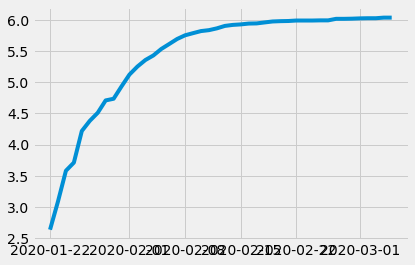

In [ ]:
df_log = np.log(df)
plt.plot(df_log)

In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['China_Beijing'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

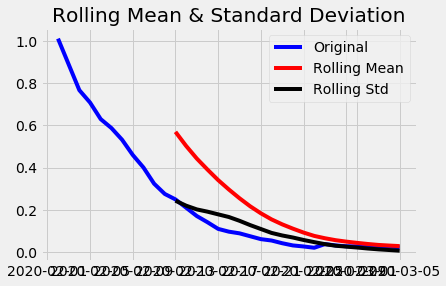

ADF Statistic: -2.8931335199351795
p-value: 0.046152322011842384
Critical Values:
	1%: -3.7112123008648155
	5%: -2.981246804733728
	10%: -2.6300945562130176


In [ ]:
# Substrating the rolling mean for stationary
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

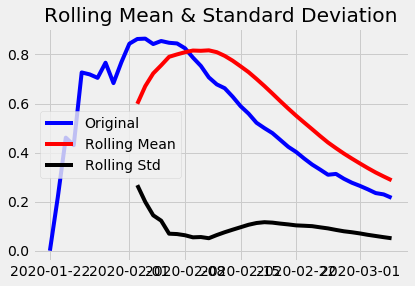

ADF Statistic: -4.637863465246198
p-value: 0.00010992991557882089
Critical Values:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


In [ ]:
# Exponencial decay for stationary
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

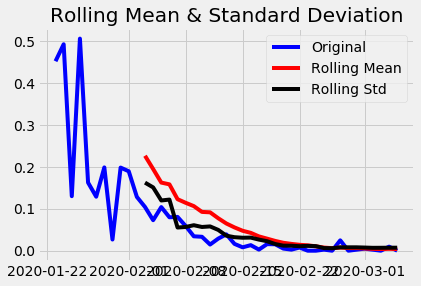

ADF Statistic: -4.148748933608085
p-value: 0.0008036288171985789
Critical Values:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


In [ ]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

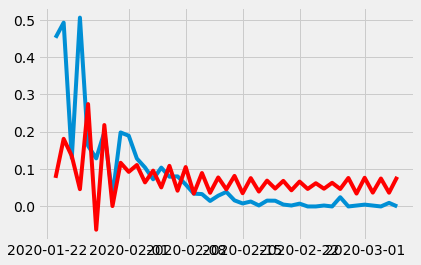

In [ ]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

date
2020-01-23    0.076548
2020-01-24    0.181201
2020-01-25    0.135025
2020-01-26    0.046313
2020-01-27    0.274299
2020-01-28   -0.062276
2020-01-29    0.218100
2020-01-30    0.001057
2020-01-31    0.116995
2020-02-01    0.092672
2020-02-02    0.111002
2020-02-03    0.064523
2020-02-04    0.095956
2020-02-05    0.051014
2020-02-06    0.108799
2020-02-07    0.042198
2020-02-08    0.105564
2020-02-09    0.034479
2020-02-10    0.089538
2020-02-11    0.036599
2020-02-12    0.077724
2020-02-13    0.045805
2020-02-14    0.081796
2020-02-15    0.035500
2020-02-16    0.075878
2020-02-17    0.039892
2020-02-18    0.069194
2020-02-19    0.047926
2020-02-20    0.068528
2020-02-21    0.043314
2020-02-22    0.066596
2020-02-23    0.046883
2020-02-24    0.062213
2020-02-25    0.047538
2020-02-26    0.063364
2020-02-27    0.046846
2020-02-28    0.076336
2020-02-29    0.034563
2020-03-01    0.076830
2020-03-02    0.037111
2020-03-03    0.074801
2020-03-04    0.036914
2020-03-05    0.079344
dtype:

In [ ]:
df_log_shift

region,China_Beijing
date,
2020-01-23,0.451985
2020-01-24,0.492476
2020-01-25,0.130053
2020-01-26,0.505936
2020-01-27,0.162519
2020-01-28,0.128833
2020-01-29,0.198671
2020-01-30,0.026668
2020-01-31,0.198275


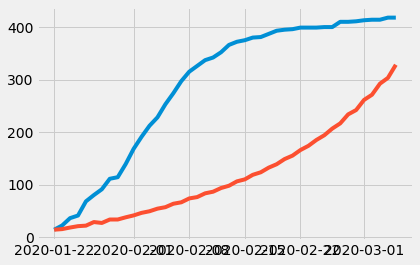

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['China_Beijing'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

In [ ]:
# results.plot_predict(1,264)

In [ ]:
import rpy2
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('pracma')
install.packages('reshape')

In [ ]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/content/drive/My Drive/corona-virus/ts_r.csv")
all$X1<-NULL
date<-all[,1]
# add next date
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

In [ ]:
p=%R pred_all

In [ ]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

Pre Processing Data for ML Model

In [ ]:
# preceding days' weather data
w=pd.read_csv('https://raw.githubusercontent.com/Rank23/COVID19/master/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

# weather forecast data
w_forecast=pd.read_csv('https://raw.githubusercontent.com/Rank23/COVID19/master/w.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

Build Train Set Data Structure

In [ ]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 

t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [ ]:
print(t)

           date           region  confirmed
0    2020-01-22  Afghanistan_nan        0.0
1    2020-01-23  Afghanistan_nan        0.0
2    2020-01-24  Afghanistan_nan        0.0
3    2020-01-25  Afghanistan_nan        0.0
4    2020-01-26  Afghanistan_nan        0.0
...         ...              ...        ...
9085 2020-03-02      Vietnam_nan       16.0
9086 2020-03-03      Vietnam_nan       16.0
9087 2020-03-04      Vietnam_nan       16.0
9088 2020-03-05      Vietnam_nan       16.0
9089 2020-03-06      Vietnam_nan       16.0

[9090 rows x 3 columns]


In [ ]:
t.tail(7)

,date,region,confirmed
9285,2020-03-01,Vietnam_nan,16.0
9286,2020-03-02,Vietnam_nan,16.0
9287,2020-03-03,Vietnam_nan,16.0
9288,2020-03-04,Vietnam_nan,16.0
9289,2020-03-05,Vietnam_nan,16.0
9290,2020-03-06,Vietnam_nan,16.0
9291,2020-03-07,Vietnam_nan,0.0


In [ ]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=(t.iloc[i-1,2]/t.iloc[i-2,2]-1)*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=(t.iloc[i-1,2]/t.iloc[i-4,2]-1)*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=(t.iloc[i-1,2]/t.iloc[i-8,2]-1)*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
train['infected_rate'] =train['last_day']/train['population']*10000
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
# fill missing weather 
# for i in range(0,len(train)):
#   if(np.isnan(train.iloc[i,13])):
#     if(train.iloc[i,1] is train.iloc[i-1,1]):
#       train.iloc[i,13]=train.iloc[i-1,13]
#       train.iloc[i,14]=train.iloc[i-1,14]

In [ ]:
t.tail()

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction
9287,2020-03-03,Vietnam_nan,16.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0
9288,2020-03-04,Vietnam_nan,16.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0
9289,2020-03-05,Vietnam_nan,16.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0
9290,2020-03-06,Vietnam_nan,16.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0
9291,2020-03-07,Vietnam_nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0


In [ ]:
  train[1500:]

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max
1500,2020-02-12,China_Guangdong,1219,18,82,364,1.553063,7.488584,44.772448,1177,1266.0,179800000,0.065462,14.6,21.5
1501,2020-02-13,China_Guangdong,1241,42,88,324,3.568394,7.780725,36.201117,1219,1283.0,179800000,0.067798,16.0,24.0
1502,2020-02-14,China_Guangdong,1261,22,82,271,1.804758,7.075065,27.938144,1241,1296.0,179800000,0.069021,18.0,23.0
1503,2020-02-15,China_Guangdong,1294,20,84,227,1.611604,7.136788,21.953578,1261,1308.0,179800000,0.070133,12.0,21.1
1504,2020-02-16,China_Guangdong,1316,33,75,199,2.616971,6.152584,18.173516,1294,1327.0,179800000,0.071969,16.4,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8046,2020-03-02,Vietnam_nan,16,0,0,0,0.000000,0.000000,0.000000,16,16.0,95540000,0.001675,NaN,NaN
8047,2020-03-03,Vietnam_nan,16,0,0,0,0.000000,0.000000,0.000000,16,16.0,95540000,0.001675,NaN,NaN
8048,2020-03-04,Vietnam_nan,16,0,0,0,0.000000,0.000000,0.000000,16,16.0,95540000,0.001675,NaN,NaN
8049,2020-03-05,Vietnam_nan,16,0,0,0,0.000000,0.000000,0.000000,16,16.0,95540000,0.001675,NaN,NaN


In [ ]:
# Select region
region='China_Hubei'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])    
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p.tail(10)

,date,region,confirmed,kalman_prediction
1745,2020-02-26,China_Hubei,65187,65429.0
1746,2020-02-27,China_Hubei,65596,65568.0
1747,2020-02-28,China_Hubei,65914,65837.0
1748,2020-02-29,China_Hubei,66337,66141.0
1749,2020-03-01,China_Hubei,66907,66529.0
1750,2020-03-02,China_Hubei,67103,67059.0
1751,2020-03-03,China_Hubei,67217,67438.0
1752,2020-03-04,China_Hubei,67332,67660.0
1753,2020-03-05,China_Hubei,67466,67784.0
1754,2020-03-06,China_Hubei,0,67865.0


In [ ]:
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.tail(10)

,region,confirmed,kalman_prediction
date,,,
2020-02-26,China_Hubei,65187.0,65429.0
2020-02-27,China_Hubei,65596.0,65568.0
2020-02-28,China_Hubei,65914.0,65837.0
2020-02-29,China_Hubei,66337.0,66141.0
2020-03-01,China_Hubei,66907.0,66529.0
2020-03-02,China_Hubei,67103.0,67059.0
2020-03-03,China_Hubei,67217.0,67438.0
2020-03-04,China_Hubei,67332.0,67660.0
2020-03-05,China_Hubei,67466.0,67784.0


         region           mse          rmse          mae
38  China_Hubei  1.134828e+08  10652.830537  3369.863636


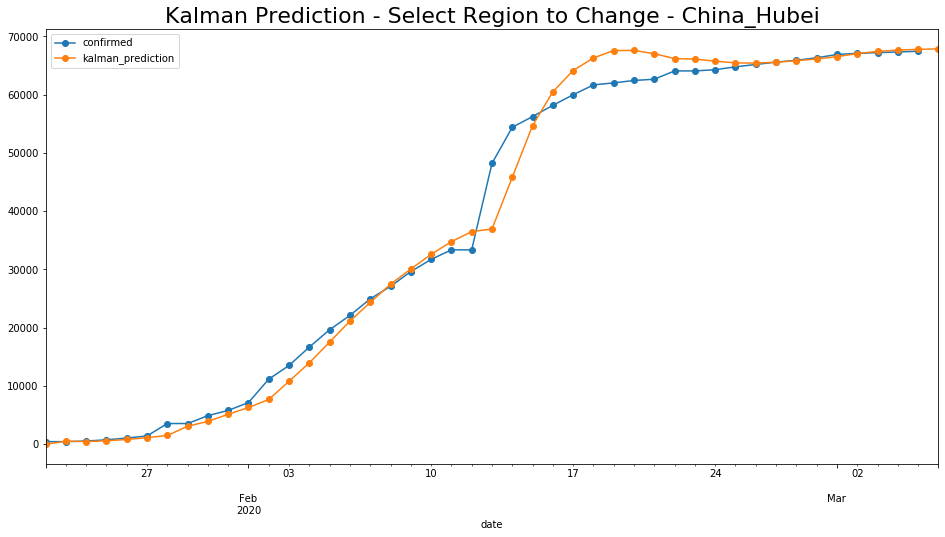

In [ ]:
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]),fontdict={'fontsize': 22})
print(evaluation[evaluation['region']==p.iloc[0,0]])

            region          mse       rmse        mae
49  China_Shanghai  2689.522727  51.860609  13.659091


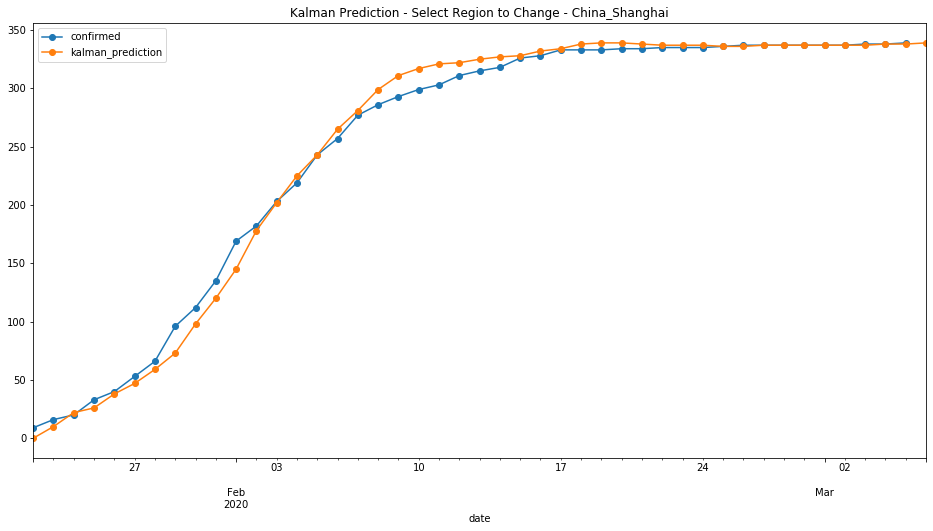

In [ ]:
# Select region
region='China_Shanghai'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

       region            mse        rmse         mae
80  Italy_nan  401472.613636  633.618666  169.613636


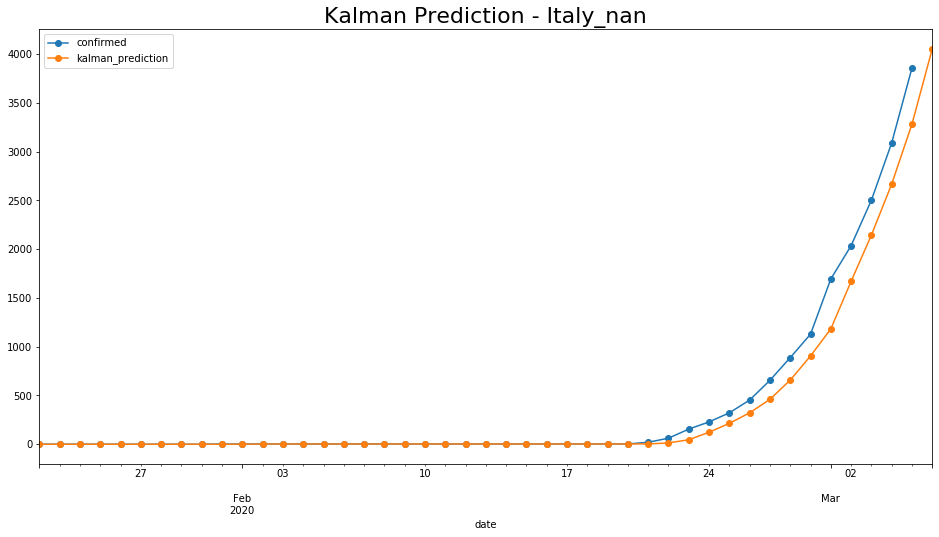

In [ ]:
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - {}'.format(p.iloc[0,0]),fontdict={'fontsize': 22})
print(evaluation[evaluation['region']==p.iloc[0,0]])

Regression - 1 Day Prediction

In [ ]:
!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='8G')
import numpy as np
from sklearn.linear_model import LinearRegression

     |████████████████████████████████| 126.2MB 74kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.3-py2.py3-none-any.whl size=126303006 sha256=0f11f667f7a812da4c70537b840ae9e4b10ad0aee870b18ebe02975d37217094
  Stored in directory: /root/.cache/pip/wheels/fa/7c/ce/95ae52b4d3f1b14a27c3c961c1f94635aee841ab1eec3aeeca
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmpxzo7rj
  JVM stdout: /tmp/tmpmpxzo7rj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmpxzo7rj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
C

H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_unknownUser_x5j7m1
H2O cluster total nodes:,1
H2O cluster free memory:,8 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [ ]:
# today's date
from datetime import date, datetime, timedelta
today_int = date.today()
today_str = str(today_int)
today_str

'2020-03-06'

In [ ]:
# recent days for boosting below
d = datetime.today() - timedelta(days=5)
boosting_date = str(d.date())
boosting_date

'2020-03-01'

In [ ]:
# available datasets to train
d2 = datetime.today() - timedelta(days=1)
training_d = str(d2.date())
training_d

'2020-03-05'

In [ ]:
train.tail()

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max
8046,2020-03-02,Vietnam_nan,16,0,0,0,0.0,0.0,0.0,16,16.0,95540000,0.001675,0.0,0.0
8047,2020-03-03,Vietnam_nan,16,0,0,0,0.0,0.0,0.0,16,16.0,95540000,0.001675,0.0,0.0
8048,2020-03-04,Vietnam_nan,16,0,0,0,0.0,0.0,0.0,16,16.0,95540000,0.001675,0.0,0.0
8049,2020-03-05,Vietnam_nan,16,0,0,0,0.0,0.0,0.0,16,16.0,95540000,0.001675,0.0,0.0
8050,2020-03-06,Vietnam_nan,0,0,0,0,0.0,0.0,0.0,16,16.0,95540000,0.001675,0.0,0.0


In [ ]:
train=train.fillna(0) 
train_df=train[train['date']<training_d]

# some bootstrap to give more weight for recent days
boots=train_df[train_df['date']>=boosting_date] 
train_df=train_df.append([boots[boots['date']>=boosting_date]]*1000,ignore_index=True)
train_df_hubei=train_df[train_df['region']=='China_Hubei']
test=train[train['date']>=training_d]
test=test[test['date']<training_d]
test

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max


In [ ]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            # '1_day_change_rate', 
            #'3_day_change_rate',
             '7_day_change_rate', 
            'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
          ]

In [ ]:
x=train_df[x_col]
x.tail()

,1_day_change,3_day_change,7_day_change,7_day_change_rate,last_day,kalman_prediction,infected_rate,min,max
699700,0,0,0,0.0,0,0.0,0.000000,0.0,0.0
699701,0,0,0,0.0,16,16.0,0.001675,0.0,0.0
699702,0,0,0,0.0,16,16.0,0.001675,0.0,0.0
699703,0,0,0,0.0,16,16.0,0.001675,0.0,0.0
699704,0,0,0,0.0,16,16.0,0.001675,0.0,0.0


In [ ]:
y=train_df['confirmed']
y.tail()

699700     0
699701    16
699702    16
699703    16
699704    16
Name: confirmed, dtype: int64

In [ ]:
reg = LinearRegression().fit(x,y)

In [ ]:
# pred2=reg.predict(test[x_col])
pred2=reg.predict(x)
pred2=pd.DataFrame(pred2)
pred2=round(pred2)
pred2

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
699700,1.0
699701,17.0
699702,17.0
699703,17.0


In [ ]:
len(pred2[0])
len(test['confirmed'].values)
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# #pred2.iloc[:55]

0

In [ ]:
train_h20 = h2o.H2OFrame(train_df)
train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)
model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

test_h20 = h2o.H2OFrame(test)
# test_h20_hubei = h2o.H2OFrame(test_hubei)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF

,variable,relative_importance,scaled_importance,percentage
0,kalman_prediction,5.639837e+12,1.000000,0.299381
1,infected_rate,3.798029e+12,0.673429,0.201612
2,last_day,3.604191e+12,0.639059,0.191322
3,1_day_change_rate,1.704910e+12,0.302298,0.090502
4,max,1.536820e+12,0.272494,0.081579
5,3_day_change_rate,1.178068e+12,0.208883,0.062536
6,7_day_change,8.181791e+11,0.145071,0.043432
7,7_day_change_rate,2.815062e+11,0.049914,0.014943
8,3_day_change,1.406860e+11,0.024945,0.007468
9,min,8.313000e+10,0.014740,0.004413


Correlation Matrix and Temperature

Correlation Matrix


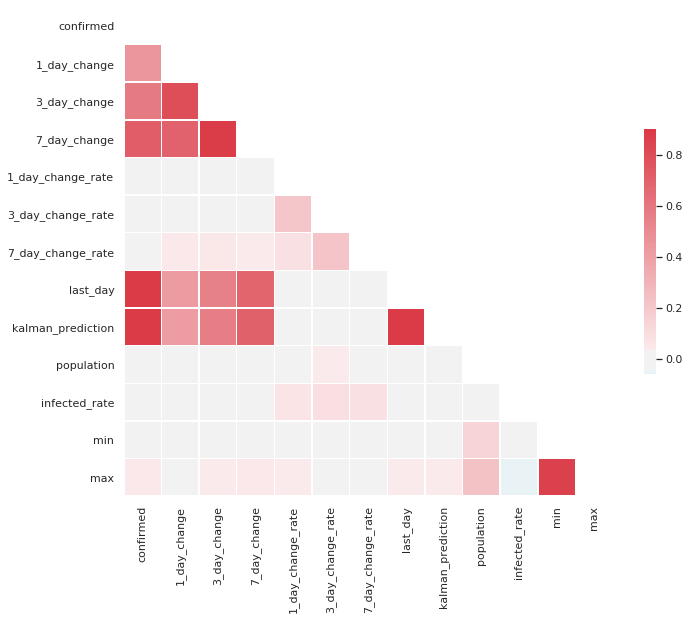

In [ ]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [ ]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.451274
3_day_change         0.586429
7_day_change         0.716908
1_day_change_rate   -0.001319
3_day_change_rate    0.002339
7_day_change_rate    0.011857
last_day             0.973532
kalman_prediction    0.974573
population           0.024127
infected_rate       -0.008476
min                  0.021592
max                  0.044477
Name: confirmed, dtype: float64


Text(0.5, 1.0, 'Daily Min/Max Temperature - Hubei')

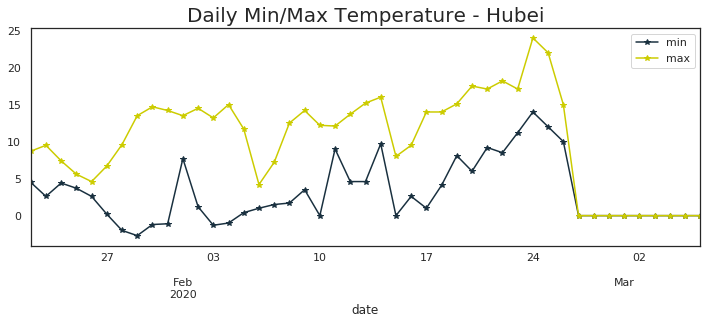

In [ ]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='China_Hubei']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Hubei',fontdict={'fontsize': 20})